Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Ilya Grebenkin"
COLLABORATORS = "-"

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1D square well

Consider a quantum particle, described by the wave function $\psi(x)$ moving in an external potential $V(x)$.
For simplicity, only consider a one-dimensional real variable $x$.

The wave function of a particle obeys the Schoedinger equation


$$
-\frac{\hbar^2}{2m} \psi''(x)  + V(x)\psi(x) = E\psi(x)\;.
$$

Here $\hbar$ is the Planck's constant, $m$ is the mass of the particle (both are known), and $E$ is the energy of the particle.

Given boundary conditions, the non-zero solution for $\psi(x)$ _only exists for some values of the energies_. Physisists say that the energy of a particle is _quantized_. Mathematicians say that the problem is nothing but the eigenvalue problem of the Sturm-Liouville operator


$$
L = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2} + V(x) \;.
$$


Here we consider the so-called square well potential, 

$$
V(x) = %
\begin{cases}
&0, &0 < x < a \\
&\infty, &\text{otherwise.} 
\end{cases}
$$

Define
$$
E = \frac{\hbar^2}{2m} k^2
$$

The Schroedinger equation for $0 < x < a$ becomes

$$
\psi''(x) = -k^2 \psi(x)
$$

with the boundary conditions $\psi(0) = \psi(a) = 0$.

Solutions are

$$\psi_n(x) = \sqrt{\frac{2}{a}} \sin{k_n x}$$


with

$$
k_n a = \pi n\;, \qquad n = 1, 2, \cdots
$$

So that the eigenenergies are

$$
E_n = \frac{\pi^2\hbar^2}{2ma^2} n^2
$$

## Eigenfunctions, numerically

Define a mesh

$$x_j = a \frac{j}{N}, \qquad j=0, \cdots, N
$$

and the mesh function $\psi_j$.

The Schroedinger equation becomes

$$
\psi_{j-1} + \psi_{j+1} - 2\psi_{j} = -k^2 h^2 \psi_j \; , \qquad j = 1, \cdots, N-1
$$

where $h=a/N$ is the grid spacing, and the boundary conditions are $\psi_0 = \psi_N = 0$.

Note that the last equation defines the eigenvalue problem in the $N-1$ dimensional space spanned by vectors $(\psi_1, \psi_2, \cdots, \psi_{N-1})^T$. Here the matrix, whose eigenvalues we are looking for, is tridiagonal, and the allowed values of $(k h)^2$ are its eigenvalues.

Write the function that returns the matrix for the eigenvalue problem above.

The numpy function `np.fill_diagonal` may be handy. Also note that to fill sub- and superdiagonals, you may slice the matrix, like so: `a[1:, :]`.

In [3]:
def hamiltonian(npts):
    """Construct the eigenvalue matrix for the discretized 1D Schroedinger equation.
    
    Parameters
    ----------
    npts : int
        The number of nodes in the mesh: $x_j = a*j /npts$, with $j=0, ..., npts$
        
    Returns
    -------
    ham : ndarray, shape(npts-1, npts-1)
        The matrix of the mesh version of the Sturm-Liouville operator.
    """
    # YOUR CODE HERE
    ham = np.zeros((npts - 1, npts - 1))
    np.fill_diagonal(ham[1:, :], -1)
    np.fill_diagonal(ham[:, 1:], -1)
    np.fill_diagonal(ham, 2)
    return ham

In [4]:
N = 20
ham = hamiltonian(N)
assert ham.shape == (N - 1, N - 1)


### Solve the eigenvalue problem

Write a function which returns the eigenvalues and eigenvectors of the discretized hamiltonian given the number of the mesh points,.

In [5]:
def eigensystem(N):
    """Construct the Hamiltonian on a mesh and compute its eigenvalues and eigenvectors.
    
    Return eigenvalues in the sorted order.
    
    Parameters
    ----------
    N : int
        The number of nodes in the mesh: $x_j = a*j /N$, with $j=0, ..., N$.
        
    Returns
    -------
    vals : ndarray, shape(N-1,)
        Eigenvalues, in the ascending order.
        
    vects : ndarray, shape(N-1, N-1)
        Eigenvectors arranged in columns: `vect[:, j]` is the 
        normalized eigenvector corresponding to `vals[j]`.
    """
    # YOUR CODE HERE
    H = hamiltonian(N)
    vals, vects = np.linalg.eigh(H)
    return vals, vects

In [6]:
from numpy.testing import assert_allclose

N = 10
ham = hamiltonian(10)
vals, vects = eigensystem(10)

assert (vals[1:] >= vals[:-1]).all()

for j in range(vals.shape[0]):
    assert_allclose(ham @ vects[:, j],
                    vals[j] * vects[:, j], atol=1e-10)


### Long-wavelength limit of the FD problem

We expect that in the limit of $N\to\infty$ solutions of the discretized system tends to the solution of the continuous problem. 

Plot the spectrum of the FD problem for several values of $N$. Note that the spectrum is bounded, i.e. we can only hope that low-lying eigenstates match: for large enough $N$, several first eigenstates of the FD problem are close to the corresponding eigenstates of the continuous problem. (See e.g. A.A. Samarski and A.V. Gulin, Sec 1.4.4 for details)

Из задания известно:
$$
k_n a = \pi n\;, \qquad n = 1, 2, \cdots
 $$where$(k h)^2$ are eigenvalues, $h = \dfrac{a}{N}$.
 Возьмем $a=1$,  тогда:
  $eigval_i = \frac{k_i}{N} \Rightarrow k_i = eigval_i \cdot N$

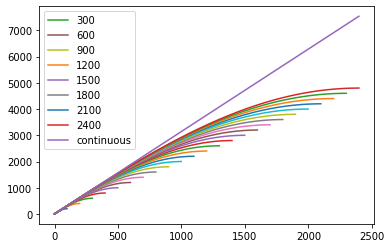

In [7]:
# Plot the spectrum of the FD problem for several values of N. 
# Plot the spectrum of the continuous problem on the same plot.
for k in range(1, 25):
    n = 100 * k
    evals, evecs = eigensystem(n)
    if k % 3 == 0:
        plt.plot(np.sqrt(evals) * n, label=n)
    else:
        plt.plot(np.sqrt(evals) * n)
plt.plot(np.pi * np.arange(1, n), label="continuous")
plt.legend(loc='best')
plt.show()

}Make the function in the cell below return a value of $N$ such that the first 10 eigenvalues of the FD problem and the continuous problem match within the relative tolerance of $10^{-3}$.

In [22]:
def get_large_N():
    # YOUR CODE HERE
    counter = 0
    rtol = 1e-3
    N = 100
    N = N / np.log(5)
    while counter != 10:
        counter = 0
        N = int(N * np.log(5))
        evals, evecs = eigensystem(N)
        evals = np.sqrt(evals)*N
        for i in range(10):
            if (-evals[i] + np.pi * (i + 1)) / (np.pi * (i + 1)) <= rtol:
                counter += 1
    return N

In [23]:
get_large_N()

257

In [24]:
NN = get_large_N()

vals, _ = eigensystem(NN)

# the rest of this cell is a test which compares first 10 eigenvalues


### Wave functions

Plot the wave functions (i.e. eigenvectors) for several lowest eigenstates. Compare to expected form. How many zeros does the eigenfunction number $k$ have?

***

Solutions are

$$\psi_n(x) = \sqrt{\frac{2}{a}} \sin{k_n x}$$***

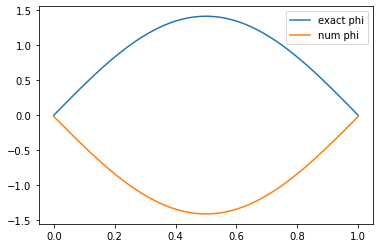

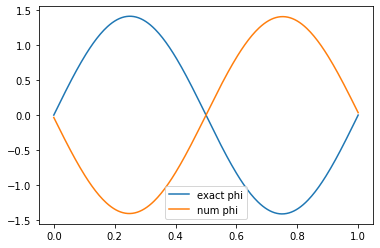

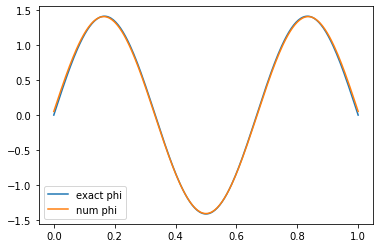

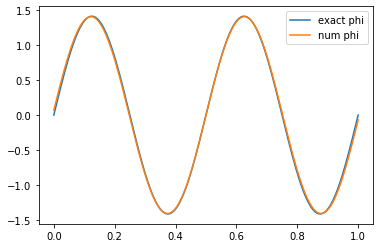

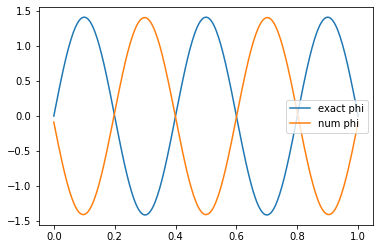

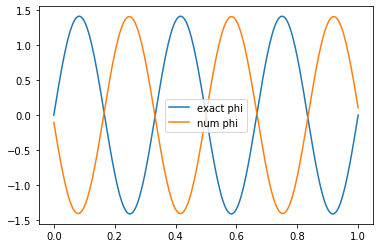

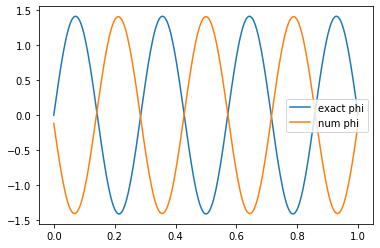

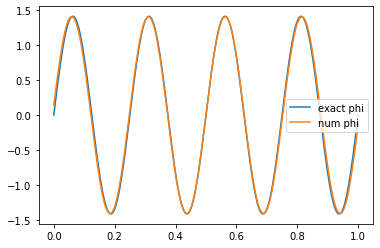

In [49]:
# plot the wave functions here
N = get_large_N()
xx = np.linspace(0, 1, N-1)
evecs = eigensystem(N)[1]
for i in range(8):
    k_i = (i + 1) * np.pi
    phi = np.sqrt(2) * np.sin(k_i * xx)
    plt.plot(xx, phi, label='exact phi')
    plt.plot(xx, np.linalg.norm(phi) * evecs[:, i], label='num phi')
    plt.legend()
    plt.show()

Видим, что большая часть решений получается в противофазе.

# Perturbation

Consider now the modified potential: add to the square well potential the additional term 

$$
V(x) = -\frac{\hbar^2}{2m}\, \gamma\, x(x-a)
$$

for $0 < x < a$, where $\gamma$ is a constant.

An analytic solution is no longer possible, but the numeric solution is a straightforward extension of what we did in the previous section.

## Numeric solution

Again, define a grid function $\psi_j$. The Schroedinger equation then becomes

$$
-\left( \psi_{j-1} + \psi_{j+1} - 2\psi_{j} \right) - \gamma h^2 x_j (x_j - a) \psi_j = k^2 h^2 \psi_j \; , \qquad j = 1, \cdots, N-1
$$

so that the diagonal elements of the Hamiltonian matrix are no longer constants.

Construct the hamiltonian matrix, solve for the eigenvalues and plot the ground state wave functions for a range of $\gamma$. Discuss the structure of the wave function for $\gamma > 500$.

In [35]:
def hamiltonian_perturbed(gamma, npts):
    """Construct the eigenvalue matrix for the discretized 1D Schroedinger equation.
    
    Parameters
    ----------
    gamma : float
        The extra potential is $gamma * x * (x-1)$
    npts : int
        The number of nodes in the mesh: $x_j = a*j /npts$, with $j=0, ..., npts$
        
    Returns
    -------
    ham : ndarray, shape(npts-1, npts-1)
        The matrix of the mesh version of the Sturm-Liouville operator.
    """
    # YOUR CODE HERE
    x = np.arange(npts - 1) / (npts - 2)
    h = 1 / (npts - 2)
    ham = np.zeros((npts - 1, npts - 1))
    np.fill_diagonal(ham[1:, :], -1)
    np.fill_diagonal(ham[:, 1:], -1)
    np.fill_diagonal(ham, 2 - gamma * h**2 * x * (x - 1))
    return ham

In [36]:
gamma, N = 590, 11
h = hamiltonian_perturbed(gamma, N)

assert h.shape == (N - 1, N - 1)


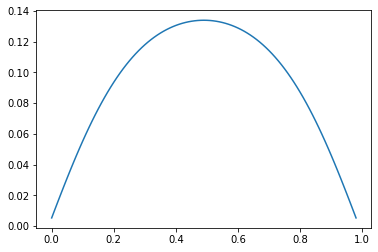

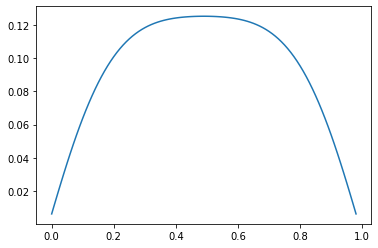

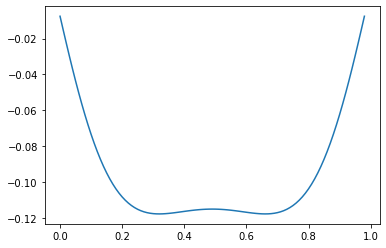

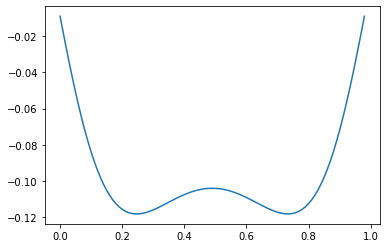

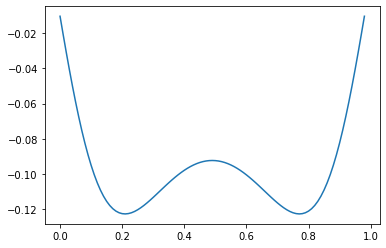

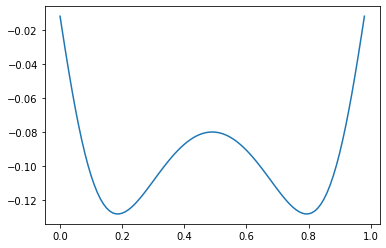

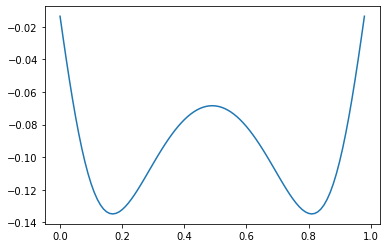

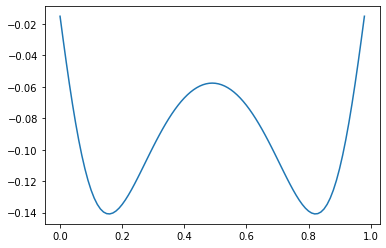

In [44]:
# YOUR CODE HERE
for gamma in [100, 200, 300, 400, 500, 600, 700, 800]:
    N = 100
    h = hamiltonian_perturbed(gamma, N)
    evecs = np.linalg.eigh(h)[1]
    plt.plot(np.arange(N-1) / N, evecs[:, 0])
    plt.show()

Bonus: discuss the structure of the spectrum at large $\gamma$.

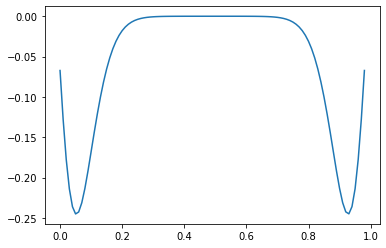

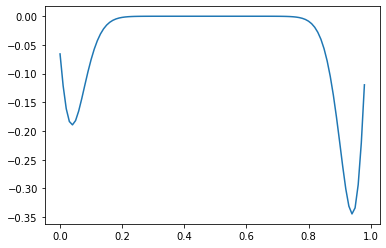

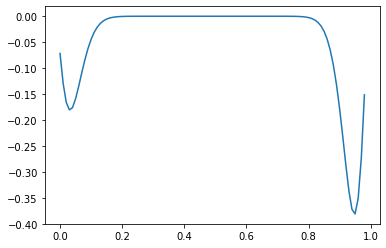

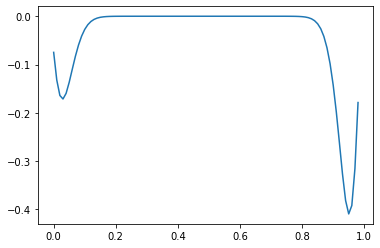

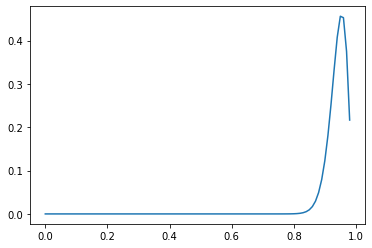

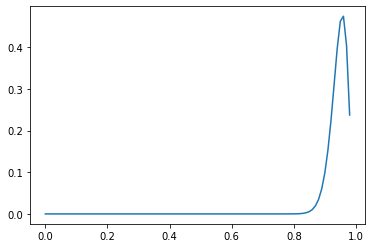

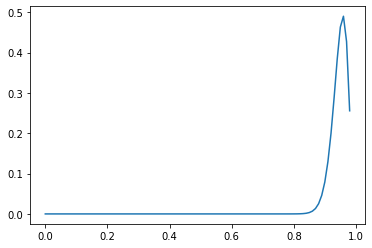

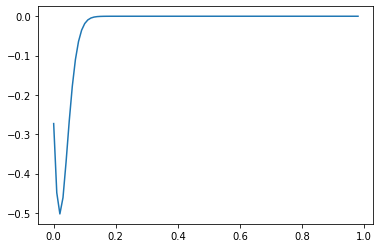

In [46]:
for gamma in [100, 200, 300, 400, 500, 600, 700, 800]:
    gamma *= 100
    N = 100
    h = hamiltonian_perturbed(gamma, N)
    evecs = np.linalg.eigh(h)[1]
    plt.plot(np.arange(N-1) / N, evecs[:, 0])
    plt.show()